In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from scipy import stats

In [57]:
df=pd.read_csv("../data/spec_in_std.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['funnel_100']=df['funnel_01']+df['funnel_10']
df

,유저_번호,고유_일자,첫_로그_일자,마지막_로그_일자,운영체제_갯수,앱_실행,조회_전환_시간,방문일자비율,앱실행비율,세션당_한도조회_시작하기_버튼_클릭,...,UVG,GVU,funnel_01,funnel_10,funnel_21,funnel_32,funnel_10_hesitate_mean,funnel_21_hesitate_sec_mean,funnel_32_hesitate_sec_mean,funnel_100
0,-1.731947,-0.548820,0.294543,0.645022,-0.131362,-0.379497,-0.43625,-0.624088,-0.396159,-0.257521,...,-0.166093,-0.11881,-0.562572,0.398222,0.738062,0.055538,-0.262502,-0.278151,-0.109757,-0.164350
1,-1.731943,0.614983,0.664315,-0.538013,-0.131362,0.209120,-0.43625,0.114219,-0.062649,0.196729,...,-0.166093,-0.11881,2.034583,0.719355,0.738062,1.564746,-0.262502,-0.318748,-0.100325,2.753937
2,-1.731924,-0.548820,0.960133,2.439972,-0.131362,-0.379497,-0.43625,-0.669455,-0.427487,1.105228,...,-0.166093,-0.11881,-0.562572,0.077090,-0.111124,-0.397224,1.468958,-0.331434,0.090680,-0.485482
3,-1.731916,-0.694295,-1.591297,-0.334041,-0.131362,-0.526651,-0.43625,-0.423089,-0.354097,0.196729,...,-0.166093,-0.11881,-0.562572,-0.565175,-0.535718,-0.548145,-0.262502,-0.311136,-0.541285,-1.127747
4,-1.731912,0.469507,0.664315,-0.701190,-0.131362,0.356274,-0.43625,0.018461,0.025520,-0.222579,...,-0.166093,-0.11881,0.381848,0.398222,0.738062,0.206459,-0.262502,-0.295912,-0.357355,0.780070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253927,1.733116,-0.257869,-0.629889,0.441050,-0.131362,-0.232343,-0.43625,-0.155644,-0.151820,0.196729,...,-0.166093,-0.11881,-0.326467,-0.244043,-0.111124,-0.095383,1.468958,-0.224868,-0.173425,-0.570510
253928,1.733120,-0.403344,-1.554320,-0.578807,-0.131362,-0.305920,-0.43625,0.351093,0.185616,2.922228,...,-0.166093,-0.11881,0.617953,1.040487,0.313469,-0.246303,-0.262502,-0.344121,0.392514,1.658440
253929,1.733124,-0.694295,0.035702,1.460908,-0.131362,-0.526651,-0.43625,-0.721346,-0.491407,0.196729,...,-0.166093,-0.11881,-0.562572,-0.565175,-0.535718,-0.548145,-0.262502,-0.336509,3.868321,-1.127747
253930,1.733128,-0.694295,-2.072002,-0.864368,-0.131362,-0.526651,-0.43625,0.669614,0.148957,0.196729,...,-0.166093,-0.11881,-0.562572,-0.565175,-0.535718,-0.548145,-0.262502,-0.336509,-0.130980,-1.127747


In [58]:
df.describe()

,유저_번호,고유_일자,첫_로그_일자,마지막_로그_일자,운영체제_갯수,앱_실행,조회_전환_시간,방문일자비율,앱실행비율,세션당_한도조회_시작하기_버튼_클릭,...,UVG,GVU,funnel_01,funnel_10,funnel_21,funnel_32,funnel_10_hesitate_mean,funnel_21_hesitate_sec_mean,funnel_32_hesitate_sec_mean,funnel_100
count,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,...,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05,2.539320e+05
mean,4.804675e-15,-1.844015e-16,1.269500e-16,3.653699e-17,4.723813e-15,-9.890198e-16,-1.543514e-16,1.051870e-13,8.631133e-14,-5.714280e-14,...,-3.656148e-15,-3.147883e-15,-1.070163e-15,7.066573e-16,-7.577509e-16,-3.473642e-16,-2.360760e-15,-5.375181e-17,1.044259e-15,1.533121e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.913337e+00
min,-1.731947e+00,-6.942948e-01,-2.219911e+00,-1.027545e+00,-1.313619e-01,-5.266510e-01,-4.362497e-01,-7.611328e-01,-5.097243e-01,-1.166020e+00,...,-1.660926e-01,-1.188102e-01,-5.625722e-01,-5.651749e-01,-5.357176e-01,-5.481449e-01,-1.993963e+00,-4.380010e-01,-8.525516e-01,-1.127747e+00
25%,-8.651349e-01,-5.488195e-01,-7.408204e-01,-8.235733e-01,-1.313619e-01,-4.530740e-01,-4.362497e-01,-5.578929e-01,-4.136303e-01,-6.418861e-01,...,-1.660926e-01,-1.188102e-01,-5.625722e-01,-5.651749e-01,-5.357176e-01,-3.972241e-01,-2.625024e-01,-3.415835e-01,-4.469621e-01,-8.916422e-01
50%,1.718560e-05,-2.578690e-01,2.945427e-01,-3.748358e-01,-1.313619e-01,-3.059198e-01,-4.362497e-01,-3.030119e-01,-2.573562e-01,-1.061043e-01,...,-1.660926e-01,-1.188102e-01,-3.264672e-01,-2.440425e-01,-1.111244e-01,-2.463033e-01,-2.625024e-01,-2.857628e-01,-2.300189e-01,-5.705098e-01
75%,8.657021e-01,1.785568e-01,8.861788e-01,6.042277e-01,-1.313619e-01,6.196559e-02,-2.256313e-01,1.592132e-01,4.702440e-02,1.967289e-01,...,-1.660926e-01,-1.188102e-01,1.457428e-01,7.708989e-02,3.134688e-01,5.553827e-02,1.468958e+00,-1.893453e-01,6.474089e-02,2.228326e-01
max,1.733132e+00,1.254395e+01,1.145020e+00,2.684738e+00,1.518758e+01,9.894956e+01,3.733995e+00,6.721508e+00,7.084737e+01,3.562821e+01,...,3.048152e+01,3.548386e+01,4.878337e+01,2.576768e+01,2.493988e+01,1.066056e+02,1.468958e+00,4.641680e+00,3.868321e+00,6.234802e+01


In [59]:
df.isnull().sum()

유저_번호                          0
고유_일자                          0
첫_로그_일자                        0
마지막_로그_일자                      0
운영체제_갯수                        0
                              ..
funnel_32                      0
funnel_10_hesitate_mean        0
funnel_21_hesitate_sec_mean    0
funnel_32_hesitate_sec_mean    0
funnel_100                     0
Length: 66, dtype: int64

In [60]:
df.columns

Index(['유저_번호', '고유_일자', '첫_로그_일자', '마지막_로그_일자', '운영체제_갯수', '앱_실행', '조회_전환_시간',
       '방문일자비율', '앱실행비율', '세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회',
       '세션당_한도조회_결과_확인', '세션당_대출관리_서비스_이용', '세션당_여윳돈_계산기_서비스_이용', '세션당_로그인',
       '세션당_본인인증완료', '세션당_DSR_계산기_서비스_이용', '세션당_회원가입', '세션당_KCB_신용정보_조회',
       '전체_이벤트', '신청서_갯수', '신청_갯수', 'R', 'F', 'M', '대출희망금액', '기대출수', '기대출금액',
       '신용점수등급', '연소득분위', '입사개월', '나이', '유저_성별', '대출_목적_0', '대출_목적_1',
       '대출_목적_2', '대출_목적_3', '근로형태_0', '근로형태_1', '근로형태_2', '고용형태_0', '고용형태_1',
       '고용형태_2', '주거소유형태_0', '주거소유형태_1', '주거소유형태_2', 'UG', 'GU', 'GV', 'UV',
       'VG', 'UGV', 'GUV', 'VU', 'VUG', 'VGU', 'UVG', 'GVU', 'funnel_01',
       'funnel_10', 'funnel_21', 'funnel_32', 'funnel_10_hesitate_mean',
       'funnel_21_hesitate_sec_mean', 'funnel_32_hesitate_sec_mean',
       'funnel_100'],
      dtype='object')

In [61]:
# # 왜도 3인 설명변수 log1p 변환
# skewd_cols=[]
# for val in df.columns:
#     if abs(df[val].skew()) > 4:
#         # print("log1p 변환이전 : ", abs(df[val].skew()))
#         skewd_cols.append(val)


In [ ]:
# for col in skewd_cols:
#     sns.kdeplot(df[col], shade=True)
#     plt.title(col+"의 밀도추정함수: 왜도 "+str(abs(df[col].skew())),fontsize=15)
#     plt.show()

In [63]:
# # 왜도 3인 설명변수 log1p 변환
# for val in df.columns:
#     if abs(df[val].skew()) > 4:
#         df[val] = np.log1p(df[val])

In [64]:
# for col in skewd_cols:
#     sns.kdeplot(df[col], shade=True)
#     plt.title(col+"의 밀도추정함수: 왜도 "+str(abs(df[col].skew())), fontsize=15)
#     plt.show()


In [65]:
def iqr(data):
    q1, q3=np.percentile(data, [25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    
    return np.where((data>upper_bound)|(data<lower_bound))


In [66]:
def z_score(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    z_scores=[(y-mean)/std for y in data]
    
    return np.where(np.abs(z_scores)>threshold)

In [67]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [68]:
df=clean_dataset(df)
df_na=df.dropna()
df_na.reset_index(inplace=True, drop=True)
df_na

,유저_번호,고유_일자,첫_로그_일자,마지막_로그_일자,운영체제_갯수,앱_실행,조회_전환_시간,방문일자비율,앱실행비율,세션당_한도조회_시작하기_버튼_클릭,...,UVG,GVU,funnel_01,funnel_10,funnel_21,funnel_32,funnel_10_hesitate_mean,funnel_21_hesitate_sec_mean,funnel_32_hesitate_sec_mean,funnel_100
0,-1.731947,-0.548820,0.294543,0.645022,-0.131362,-0.379497,-0.43625,-0.624088,-0.396159,-0.257521,...,-0.166093,-0.11881,-0.562572,0.398222,0.738062,0.055538,-0.262502,-0.278151,-0.109757,-0.164350
1,-1.731943,0.614983,0.664315,-0.538013,-0.131362,0.209120,-0.43625,0.114219,-0.062649,0.196729,...,-0.166093,-0.11881,2.034583,0.719355,0.738062,1.564746,-0.262502,-0.318748,-0.100325,2.753937
2,-1.731924,-0.548820,0.960133,2.439972,-0.131362,-0.379497,-0.43625,-0.669455,-0.427487,1.105228,...,-0.166093,-0.11881,-0.562572,0.077090,-0.111124,-0.397224,1.468958,-0.331434,0.090680,-0.485482
3,-1.731916,-0.694295,-1.591297,-0.334041,-0.131362,-0.526651,-0.43625,-0.423089,-0.354097,0.196729,...,-0.166093,-0.11881,-0.562572,-0.565175,-0.535718,-0.548145,-0.262502,-0.311136,-0.541285,-1.127747
4,-1.731912,0.469507,0.664315,-0.701190,-0.131362,0.356274,-0.43625,0.018461,0.025520,-0.222579,...,-0.166093,-0.11881,0.381848,0.398222,0.738062,0.206459,-0.262502,-0.295912,-0.357355,0.780070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253927,1.733116,-0.257869,-0.629889,0.441050,-0.131362,-0.232343,-0.43625,-0.155644,-0.151820,0.196729,...,-0.166093,-0.11881,-0.326467,-0.244043,-0.111124,-0.095383,1.468958,-0.224868,-0.173425,-0.570510
253928,1.733120,-0.403344,-1.554320,-0.578807,-0.131362,-0.305920,-0.43625,0.351093,0.185616,2.922228,...,-0.166093,-0.11881,0.617953,1.040487,0.313469,-0.246303,-0.262502,-0.344121,0.392514,1.658440
253929,1.733124,-0.694295,0.035702,1.460908,-0.131362,-0.526651,-0.43625,-0.721346,-0.491407,0.196729,...,-0.166093,-0.11881,-0.562572,-0.565175,-0.535718,-0.548145,-0.262502,-0.336509,3.868321,-1.127747
253930,1.733128,-0.694295,-2.072002,-0.864368,-0.131362,-0.526651,-0.43625,0.669614,0.148957,0.196729,...,-0.166093,-0.11881,-0.562572,-0.565175,-0.535718,-0.548145,-0.262502,-0.336509,-0.130980,-1.127747


In [69]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# #표준화
# sc = StandardScaler()
# df_scaled = sc.fit_transform(df_na.drop(['유저_번호'], axis=1))
# df_scaled=pd.DataFrame(df_scaled) #mean~min, mem_period 5개 변수가 표준화됨.
# df_scaled.columns = df_na.drop(['유저_번호'], axis=1).columns
# df_scaled['유저_번호'] = df_na['유저_번호']
# df_scaled


In [70]:
X=df_na.drop(['유저_번호'], axis=1)

Text(0.5, 1.0, 'Iris feature correlation matrix')

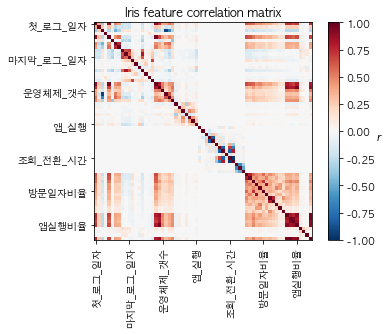

In [71]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)
# ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(X.columns), rotation=90)
# ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(X.columns))


plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")



In [72]:
X.columns, len((X.columns))

(Index(['고유_일자', '첫_로그_일자', '마지막_로그_일자', '운영체제_갯수', '앱_실행', '조회_전환_시간',
        '방문일자비율', '앱실행비율', '세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회',
        '세션당_한도조회_결과_확인', '세션당_대출관리_서비스_이용', '세션당_여윳돈_계산기_서비스_이용', '세션당_로그인',
        '세션당_본인인증완료', '세션당_DSR_계산기_서비스_이용', '세션당_회원가입', '세션당_KCB_신용정보_조회',
        '전체_이벤트', '신청서_갯수', '신청_갯수', 'R', 'F', 'M', '대출희망금액', '기대출수', '기대출금액',
        '신용점수등급', '연소득분위', '입사개월', '나이', '유저_성별', '대출_목적_0', '대출_목적_1',
        '대출_목적_2', '대출_목적_3', '근로형태_0', '근로형태_1', '근로형태_2', '고용형태_0', '고용형태_1',
        '고용형태_2', '주거소유형태_0', '주거소유형태_1', '주거소유형태_2', 'UG', 'GU', 'GV', 'UV',
        'VG', 'UGV', 'GUV', 'VU', 'VUG', 'VGU', 'UVG', 'GVU', 'funnel_01',
        'funnel_10', 'funnel_21', 'funnel_32', 'funnel_10_hesitate_mean',
        'funnel_21_hesitate_sec_mean', 'funnel_32_hesitate_sec_mean',
        'funnel_100'],
       dtype='object'),
 65)

In [73]:
corr_df = X.corr(method='pearson')
corr_cols=corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j])>0.8 and i!=j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])


('고유_일자', '전체_이벤트') 0.8763325413790567
('고유_일자', '앱_실행') 0.8745452260290336
('마지막_로그_일자', 'R') -0.9241745159619776
('앱_실행', '전체_이벤트') 0.9399301348174428
('세션당_한도조회_인트로_페이지_조회', '세션당_본인인증완료') 0.8087871702591275
('전체_이벤트', '신청서_갯수') 0.8172526302779305
('신청서_갯수', 'funnel_100') 0.8594735624701887
('신청서_갯수', 'funnel_32') 0.9411085574682121
('신청서_갯수', 'funnel_21') 0.8088740762874241
('신청서_갯수', 'funnel_01') 0.8540675184470303
('대출_목적_2', '대출_목적_3') -0.8482563868066614
('근로형태_1', '근로형태_2') -0.8261601953626542
('근로형태_2', '고용형태_1') -0.8198018454656558
('고용형태_1', '고용형태_2') -0.9669063872892253
('UV', 'GUV') 0.8368991036659923
('funnel_01', 'funnel_100') 0.9566685215168222
('funnel_01', 'funnel_32') 0.8995187015073927
('funnel_01', 'funnel_10') 0.8304293201223634
('funnel_10', 'funnel_100') 0.9566685215168182
('funnel_10', 'funnel_32') 0.8331285986309568
('funnel_10', 'funnel_21') 0.9305635476020598
('funnel_21', 'funnel_100') 0.8868513887359109
('funnel_21', 'funnel_32') 0.8519130565541352
('funne

- [고유_일자] 살리고 [전체_이벤트, 앱_실행] 드랍
- [R] 살리고 [마지막_로그_일자] 드랍
- [앱실행비율] 살리고 [방문일자비율] 드랍
- [M] 살리고 [신청서_갯수] 드랍
- [funnel_100] 살리고 [funnel_01, funnel_10, funnel_32, funnel_21] 죽이기
- [세션당_한도조회_인트로_페이지_조회] 살리고 [세션당_본인인증완료]
- [근로형태_2] 살리고 [고용형태_2]
- [UV] 살리고 [GUV] 죽이기
- [대출_목적_2] / [대출_목적_3]
- [근로형태_2] / [고용형태_1, 근로형태_1, 고용형태_2]


In [74]:
drop_cols=['전체_이벤트', '앱_실행','신청서_갯수','앱실행비율', 'funnel_01', 'funnel_10', 'funnel_32', 'funnel_21', 
           '세션당_본인인증완료','고용형태_2', 'GUV', '마지막_로그_일자', '대출_목적_3', '고용형태_1', '근로형태_1', '고용형태_2']
X_corred=X.drop(drop_cols, axis=1)
len(X_corred.columns)

50

In [75]:
corr_df = X_corred.corr(method='pearson')
corr_cols = corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j]) > 0.7 and i != j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])

('고유_일자', 'funnel_100') 0.7471116117126287
('UG', 'GU') 0.783419052450354
('GV', 'UGV') 0.7244242885284039
('VU', 'VUG') 0.7747981808598585


Text(0.5, 1.0, 'Iris feature correlation matrix')

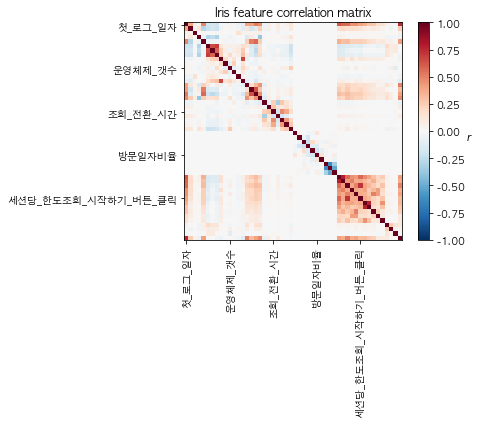

In [77]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X_corred.T), cmap="RdBu_r", vmin=-1, vmax=1)

# ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(X_corred.columns), rotation=90)
# ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(X_corred.columns))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")


# PCA, Unrotated FA, Varimax FA

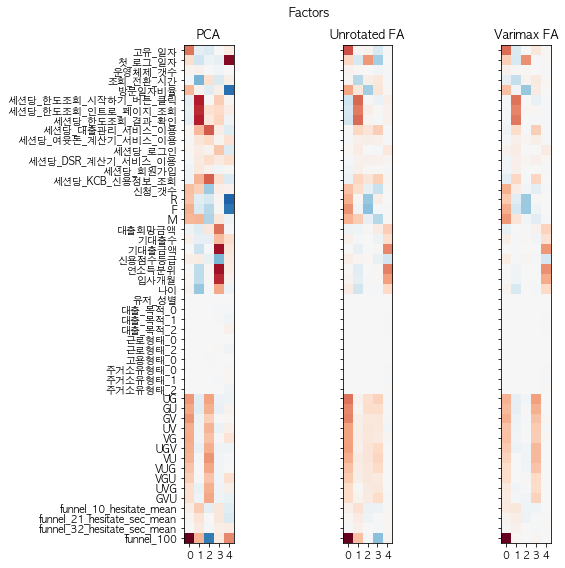

In [98]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

n_comps = 5

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X_corred)

    components = fa.components_.T
    # print("\n\n %s :\n" % method)
    # print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(X_corred.columns)))
    if ax.is_first_col():
        ax.set_yticklabels(X_corred.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([x for x in range(0, n_comps)])
    # ax.set_xticklabels([x for x in range(1, 15)])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()


## PCA

In [100]:
from sklearn.decomposition import PCA

max=0
num=0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_corred)
    principalDf = pd.DataFrame(data=printcipalComponents)#, columns=['principal component1', 'principal component2'])
    if sum(pca.explained_variance_ratio_)>max: 
        max=sum(pca.explained_variance_ratio_)
        num=i
        if max>0.75: break
        
print(max, num)

0.7518377553915886 23


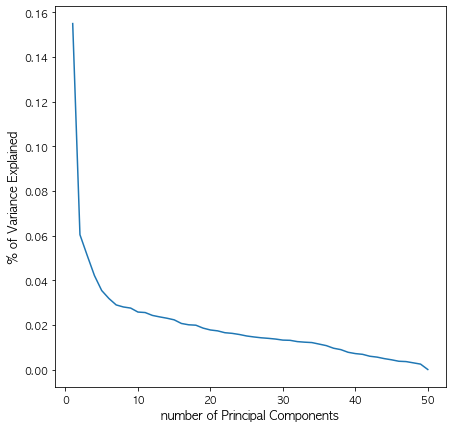

In [102]:
pca = PCA(random_state=0)
pca.fit_transform(X_corred)
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(range(1, X_corred.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel("number of Principal Components", fontsize=12)
plt.ylabel("% of Variance Explained", fontsize=12)
plt.show()


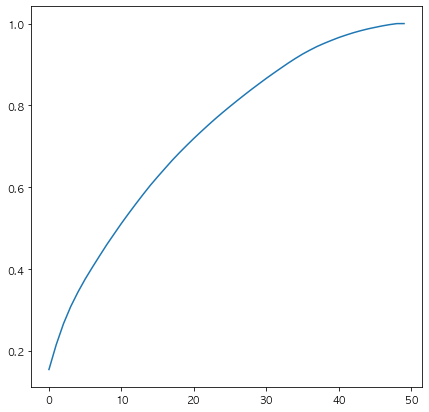

In [106]:
# PCA 주성분분석 차원 갯수  늘어날  때 마다의 설명력
pca = PCA(random_state=0)
X_p = pca.fit_transform(X_corred)

plt.plot(np.cumsum(pca.explained_variance_ratio_))


## Varimax

#### Varimax를 위한 검정

In [81]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import FactorAnalyzer

chi_square_value, p_value=calculate_bartlett_sphericity(X_corred)
chi_square_value, p_value

(4962706.733477862, 0.0)

In [82]:
kmo_all, kmo_model=calculate_kmo(X_corred)
kmo_model

0.7240038527054122

In [83]:
# Unrotated FA
fa=FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(X_corred)
ev, v=fa.get_eigenvalues()
ev

array([6.54287499e+00, 3.12652175e+00, 2.38506706e+00, 2.20498486e+00,
       1.74902352e+00, 1.67736000e+00, 1.52458042e+00, 1.45264806e+00,
       1.44502735e+00, 1.35397379e+00, 1.30057884e+00, 1.24971762e+00,
       1.24292863e+00, 1.21241991e+00, 1.15042681e+00, 1.06501210e+00,
       1.05572095e+00, 9.79379044e-01, 9.41718990e-01, 9.18848335e-01,
       9.07848564e-01, 8.71370821e-01, 8.50331917e-01, 8.22291316e-01,
       7.93763809e-01, 7.70482824e-01, 7.40007268e-01, 7.25247066e-01,
       7.12289259e-01, 6.96913681e-01, 6.91964207e-01, 6.61666548e-01,
       6.47342268e-01, 6.05708835e-01, 5.71838894e-01, 5.56319003e-01,
       4.88078660e-01, 4.72513979e-01, 3.82467396e-01, 3.61934439e-01,
       3.42919805e-01, 2.96988973e-01, 2.95373668e-01, 2.58682820e-01,
       2.21154907e-01, 1.96678114e-01, 1.89756690e-01, 1.60158371e-01,
       1.24901471e-01, 4.19140805e-03])

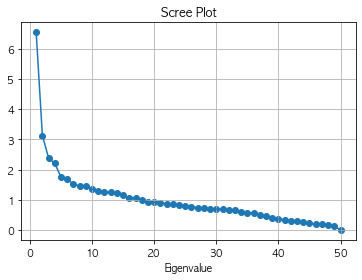

In [85]:
plt.scatter(range(1, X_corred.shape[1]+1), ev)
plt.plot(range(1, X_corred.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Eigenvalue')
plt.grid()
plt.show() # 5개가 최선?

In [91]:
# Varimax FA
fa=FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(X_corred)
efa_result=pd.DataFrame(fa.loadings_, index=X_corred.columns)
efa_result

,0,1,2,3,4
고유_일자,0.710052,0.468816,0.099064,0.020588,-0.002379
첫_로그_일자,0.221309,0.075668,-0.176265,0.008067,0.011447
운영체제_갯수,0.045506,0.019601,0.035698,-0.028239,0.000328
조회_전환_시간,0.052786,-0.011847,-0.421810,0.064562,0.010309
방문일자비율,0.387759,0.367421,0.217844,0.016562,-0.012735
세션당_한도조회_시작하기_버튼_클릭,-0.172080,-0.327347,0.723391,-0.078541,-0.013180
세션당_한도조회_인트로_페이지_조회,-0.074929,-0.416351,0.608671,-0.089960,-0.006294
세션당_한도조회_결과_확인,-0.121685,-0.384862,0.704612,-0.095848,-0.010432
세션당_대출관리_서비스_이용,0.227073,-0.468741,0.150760,-0.016429,0.005506
세션당_여윳돈_계산기_서비스_이용,0.035067,-0.161896,0.029722,-0.013179,-0.002302


<AxesSubplot:>

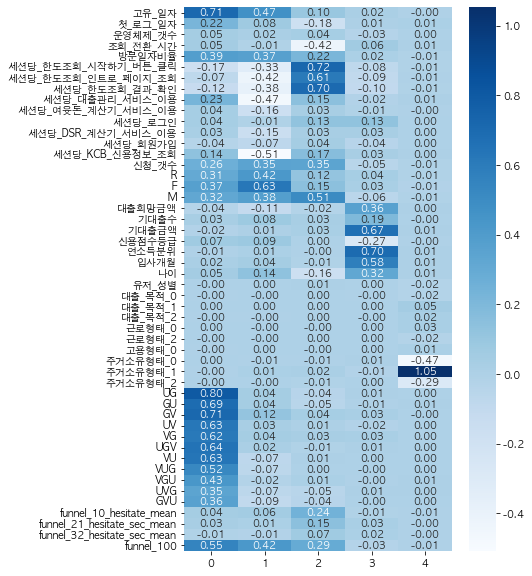

In [92]:
plt.figure(figsize=(6, 10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [108]:
fa=FactorAnalyzer(n_factors=23, rotation="varimax")
fa.fit(X_corred) # 최대우도
fa.get_factor_variance()
df1=pd.DataFrame(fa.get_factor_variance())
df1.index=['SS Loadings', 'Proportion Var', 'Cumulative Var']
df1

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
SS Loadings,2.239375,2.103408,2.087392,1.859795,1.754884,1.592361,1.471577,1.421606,1.397766,1.366888,...,0.973036,0.904589,0.869431,0.857892,0.810625,0.783969,0.723825,0.615663,0.572921,0.394579
Proportion Var,0.044787,0.042068,0.041748,0.037196,0.035098,0.031847,0.029432,0.028432,0.027955,0.027338,...,0.019461,0.018092,0.017389,0.017158,0.016212,0.015679,0.014477,0.012313,0.011458,0.007892
Cumulative Var,0.044787,0.086856,0.128604,0.165799,0.200897,0.232744,0.262176,0.290608,0.318563,0.345901,...,0.429530,0.447621,0.465010,0.482168,0.498380,0.514060,0.528536,0.540850,0.552308,0.560200


In [117]:
FAdf=pd.DataFrame(fa.fit_transform(X_corred))
FAdf

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.152871,-0.424038,-0.754897,-0.046032,1.257009,-0.132166,0.077963,-0.570886,1.847655,2.289261,...,0.673273,0.220333,-1.178645,0.421484,0.454730,-0.457200,-0.244405,0.195316,1.389678,-0.153597
1,0.433795,-0.317040,0.565804,1.137144,-0.693141,-0.867766,-0.224928,-0.061569,-0.558449,-0.443660,...,0.584696,0.974098,0.272832,-0.405075,-1.383573,-0.198535,-0.287288,-0.712877,-0.136689,-0.081527
2,0.538151,-0.075810,-1.213951,-0.193516,-0.361249,-0.890671,-0.016511,0.909670,-0.576518,-0.330119,...,0.394234,0.242574,-1.176574,-0.307315,0.475025,0.046900,0.866980,-0.440689,0.003540,-0.186279
3,0.298665,-0.075594,0.174683,-0.716243,-0.082209,-0.867254,-0.134884,-0.133334,-0.607474,-0.814819,...,0.738699,0.513217,-0.890028,-0.209605,0.538692,0.002119,-0.540294,0.176218,-0.013468,0.004880
4,-0.399576,-0.230425,0.647041,0.448707,-0.457942,-0.159681,-0.339674,-0.487640,1.866014,-0.588171,...,1.056093,0.310658,-0.130564,-0.363961,0.413096,-0.267601,-0.122660,-0.415503,-0.054084,-0.027376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253927,0.135995,-0.696160,-0.106375,-0.226651,1.412558,-0.846764,-0.186914,-0.690391,-0.626393,0.882906,...,1.591729,-0.367827,0.581344,2.089323,0.645311,-0.544114,0.869932,0.618883,-0.075361,-0.288241
253928,1.877977,1.887688,0.654818,0.435900,-0.614480,-0.863091,-0.578317,0.134365,-0.600758,-0.414910,...,0.169971,-0.017361,-1.315963,0.846561,0.083563,-0.237137,0.142645,0.176633,-0.069895,-0.419728
253929,0.256818,-0.031811,-1.430510,-0.309577,-0.058746,-0.888289,0.035421,-0.064120,-0.578327,-0.816018,...,-0.289028,0.095832,-1.230153,-0.117405,0.478904,0.134650,-0.121898,-0.421047,-0.030441,-0.116760
253930,0.160279,-0.126912,1.265954,-0.729150,-0.145507,-0.889584,-0.189528,-0.289136,-0.586774,-0.791436,...,-0.571312,0.134210,-1.094348,-0.156364,0.409249,-0.215569,-0.193098,-0.446137,-0.085294,-0.202184


- 요인 분석이 10개까지 가도 설명력이 0.38이라 소용이 없음
- 23개까지 가도 0.56

In [ ]:
a=input("무엇을 선택하시겠습니까? 선택하고 다음 단계로 넘어가시길...FAdf vs principalDf ")

In [118]:
X_cluster=principalDf.copy()

# 군집화

In [119]:
import matplotlib as mpl

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rc('axes', unicode_minus=False)  # 유니코드에서 음수 부호 설정
warnings.filterwarnings("ignore")


In [120]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette_kmeans(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster)+'\n'
                           'Silhouette Score :' + str(round(sil_avg, 3)))
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


In [121]:
visualize_silhouette_kmeans([3, 4, 5, 6], X_cluster)


# 병합 군집

In [ ]:
# from sklearn.cluster import AgglomerativeClustering

# cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
# cluster.fit_predict(X)

# DBScan

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
import math

db = DBSCAN(eps=0.3, min_samples=1000).fit(X_cluster)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" %
      metrics.silhouette_score(X_cluster, labels))


Estimated number of clusters: 78
Estimated number of noise points: 195768
Silhouette Coefficient: -0.242


In [ ]:
# epsilon, 최소 샘플 개수 설정
X_cluster_dbscan=X_cluster.copy()
X_cluster_dbscan['cluster'] = db.fit_predict(X_cluster)

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, X_cluster_dbscan['cluster'].max() + 1):
    plt.scatter(X_cluster_dbscan.loc[X_cluster_dbscan['cluster'] == i, 'Annual Income (k$)'], X_cluster_dbscan.loc[X_cluster_dbscan['cluster'] == i, 'Spending Score (1-100)'],
                label='cluster ' + str(i))

plt.legend()


# 계층 군집

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X_cluster, 'single')


In [ ]:
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()
